In [1]:
import scanpy as sc
import pandas as pd
import os
import loompy
import matplotlib.pyplot as pl
from matplotlib import rcParams
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt


/Users/mayracarneiro/anaconda3/lib/python3.8/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

-----
anndata     0.7.4
scanpy      1.6.0
sinfo       0.3.1
-----
PIL                 7.2.0
anndata             0.7.4
appnope             0.1.0
backcall            0.2.0
bottleneck          1.3.2
cairo               1.20.0
cffi                1.14.0
cloudpickle         1.5.0
colorama            0.4.3
cycler              0.10.0
cython_runtime      NA
cytoolz             0.10.1
dask                1.0.0
dateutil            2.8.1
decorator           4.4.2
future_fstrings     NA
get_version         2.1
h5py                2.10.0
igraph              0.7.1
ipykernel           5.3.2
ipython_genutils    0.2.0
jedi                0.17.1
joblib              0.16.0
kiwisolver          1.2.0
legacy_api_wrap     0.0.0
leidenalg           0.7.0
llvmlite            0.33.0+1.g022ab0f
loompy              3.0.6
matplotlib          3.2.2
mkl                 2.3.0
mpl_toolkits        NA
natsort             7.0.1
numba               0.50.1
numexpr             2.7.1
numpy               1.18.5
numpy_groupies

In [4]:
os.chdir('/Users/mayracarneiro/analysis')
os.getcwd()

NameError: name 'os' is not defined

In [3]:
adata=ad.read_h5ad("tcells_git/data/cd8.h5ad")

NameError: name 'ad' is not defined

... storing 'orig.ident' as categorical
... storing 'tissue' as categorical
... storing 'pop' as categorical
... storing 'groups' as categorical
... storing 'Phase' as categorical
... storing 'patient' as categorical


computing density on 'umap'
--> added
    'umap_density_tissue', densities (adata.obs)
    'umap_density_tissue_params', parameter (adata.uns)


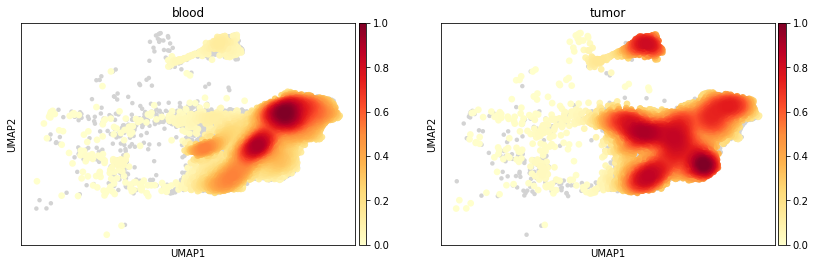

In [5]:
sc.tl.embedding_density(adata, groupby='tissue')
sc.pl.embedding_density(adata, groupby='tissue', basis='umap', ncols=3)

In [6]:
metadata=pd.read_csv('tcells_git/data/meta_cd8_subsetFromTcells_All.csv')

In [7]:
adata.obs=metadata

In [2]:
adata=adata[~adata.obs['cell_mk'].isin([ 'prolif']),:]

NameError: name 'adata' is not defined

In [ ]:
adata=adata[~adata.obs['tissue'].isin([ 'blood']),:]

... storing 'orig.ident' as categorical
... storing 'tissue' as categorical
... storing 'pop' as categorical
... storing 'groups' as categorical
... storing 'Phase' as categorical
... storing 'cdr3s_aa' as categorical
... storing 'cdr3s_nt' as categorical
... storing 'clotype' as categorical
... storing 'type' as categorical
... storing 'Cell.ID' as categorical
... storing 'patient' as categorical
... storing 'cell_mk' as categorical
... storing 'new_id' as categorical
... storing 'old.ident' as categorical


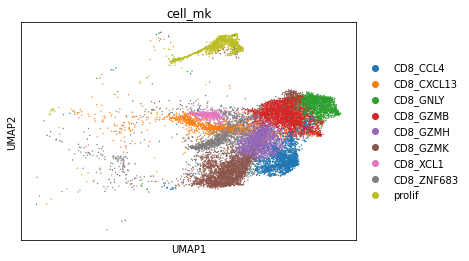

In [8]:
sc.pl.umap(adata, color='cell_mk')

In [414]:
adata_rna=ad.read_csv("tcells_git/data/cd8_rnaAssay.csv") #data normalized but not scaled

In [415]:
adata_rna.obs=metadata

In [11]:
#sc.tl.pca(adata, svd_solver='arpack', n_comps=100)
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=55)# n_neighbors=20, n_pcs=55
sc.tl.draw_graph(adata)


computing neighbors
    using 'X_pca' with n_pcs = 55
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:13)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:02:07)


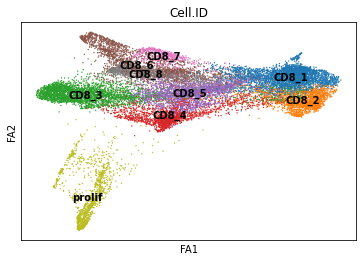

In [12]:
sc.pl.draw_graph(adata, color=['Cell.ID'], legend_loc='on data')

In [13]:
sc.tl.diffmap(adata, n_comps=55)#n_comps=55
sc.pp.neighbors(adata, n_neighbors=20, use_rep='X_diffmap')

computing Diffusion Maps using n_comps=55(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.99379903 0.9774812  0.97500813 0.96694005 0.95795316
     0.9552118  0.9508593  0.9493752  0.947856   0.93498886 0.93310666
     0.93154997 0.92896587 0.91327715 0.9094459  0.9065065  0.90414715
     0.8984905  0.89502805 0.8920604  0.88953876 0.88741004 0.8846274
     0.8830097  0.8809188  0.87995034 0.8748224  0.87175924 0.867867
     0.8662407  0.8632434  0.8584362  0.8573899  0.85565317 0.8555321
     0.8519083  0.84910643 0.8471194  0.8455655  0.8431339  0.841867
     0.83930135 0.8375803  0.8350734  0.8315373  0.82867926 0.8267866
     0.8266688  0.8253686  0.823236   0.8220306  0.81943643 0.81813633
     0.8151695 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:01)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp

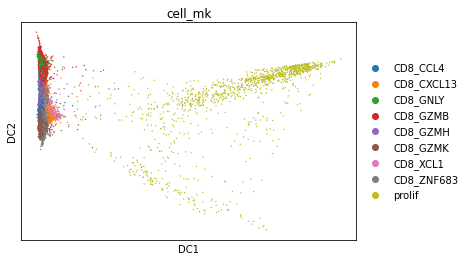

In [14]:
sc.pl.diffmap(adata, color=['cell_mk'])

In [15]:
sc.tl.draw_graph(adata)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:01:57)


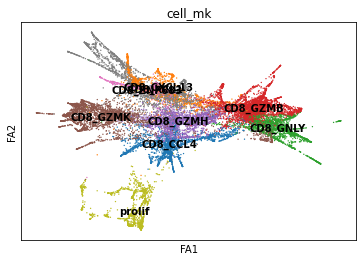

In [16]:
sc.pl.draw_graph(adata, color=['cell_mk'], legend_loc='on data')

In [17]:
sc.tl.leiden(adata, resolution=0.5)

running Leiden clustering
    finished: found 24 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:05)


In [18]:
sc.tl.paga(adata, groups='leiden')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


In [19]:
adata.obs['leiden'].cat.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
      dtype='object')

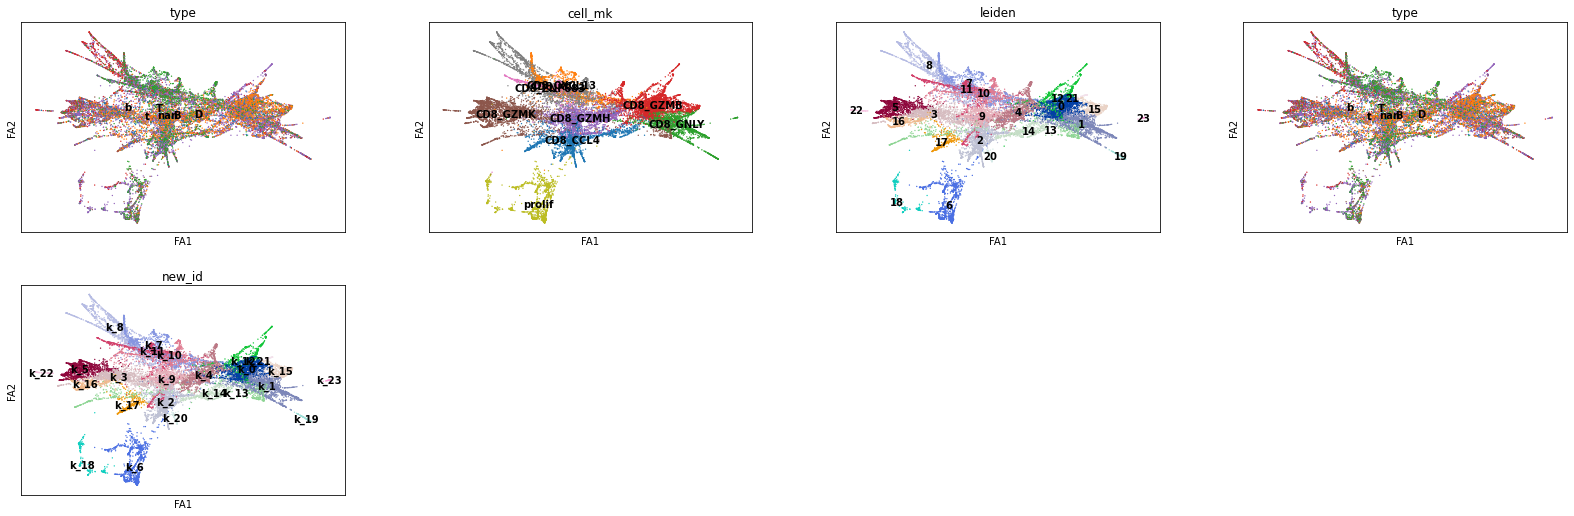

In [20]:
sc.pl.draw_graph(adata, color=[ 'type', 'cell_mk', 'leiden', 'type', 'new_id'], legend_loc='on data')

In [21]:
new_color=np.array(adata.uns['leiden_colors'])

In [22]:
new_color[[6, 18]]=["#d17597", '#e482a1'] #prolif
new_color[[7]]= "#d4ae2d" #CXCL13
new_color[[11]]= "#faf632" #XCL1
new_color[[8, 10]]= ["#ffcf20", '#ffd336']  #ZNF683
new_color[[9, 4]]= ["#ff990A", '#ffa322' ]#GZMH
new_color[[14, 2, 20, 17]] = ["#e97422", '#eb8138', '#ed8f4e', '#ef9d64'] #CCL4
new_color[[22, 5, 16, 3, 13]]= ["#bd6066", '#c36f75', '#ca7f84', '#d08f93', '#d79fa3'] #GZMK
new_color[[19, 23, 1]] = ["#94539e", '#9e64a7', '#a975b1' ]#GNLY
new_color[[0, 12, 21, 15]]= ["#747b78", '#818885', '#8f9593', '#9da2a0'] #GZMB

In [23]:
adata.uns['leiden_colors']=new_color

In [24]:
adata.obs['leiden_anno']=adata.obs['leiden']

In [25]:
adata.obs['leiden_anno'].cat.categories=['CD8.GZMB.a', 'CD8.GNLY.a', 'CD8.CCL4.a', 'CD8.GZMK.a', 'CD8GZMH.a', 'CD8.GZMK.b', 
     'prolif.a', 'CD8.CXCL13', 'CD8.ZNF683.a', 'CD8.GZMH.b','CD8.ZNF683.b', 'CD8.XCL1', 
    'CD8.GZMB.b', 'CD8.GZMK.c', 'CD8.CCL4.b', 'CD8.GZMB.c', 'CD8.GZMK.d', 'CD8.CCL4.c',
        'prolif.b', 'CD8.GNLY.b', 'CD8.CCL4.d', 'CD8.GZMB.d', 'CD8.GZMK.e', 'CD8.GNLY.c']

--> added 'pos', the PAGA positions (adata.uns['paga'])


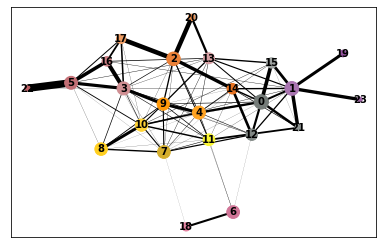

In [26]:
sc.pl.paga(adata, color=[ 'leiden'])

In [27]:
new_color_mk=np.array(adata.uns['cell_mk_colors'])
new_color_mk

array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
       '#e377c2', '#7f7f7f', '#bcbd22'], dtype='<U7')

In [28]:
new_color_mk[[8]]=["#d17597"] #prolif
new_color_mk[[1]]= "#d4ae2d" #CXCL13
new_color_mk[[6]]= "#faf632" #XCL1
new_color_mk[[7]]= ["#ffcf20"]  #ZNF683
new_color_mk[[4]]= ["#ff990A" ]#GZMH
new_color_mk[[0]] = ["#e97422"] #CCL4
new_color_mk[[5]]= ["#bd6066"] #GZMK
new_color_mk[[2]] = ["#94539e"]#GNLY
new_color_mk[[3]]= ["#747b78"] #GZMB

In [29]:
adata.uns['cell_mk_colors']=new_color_mk

--> added 'pos', the PAGA positions (adata.uns['paga'])


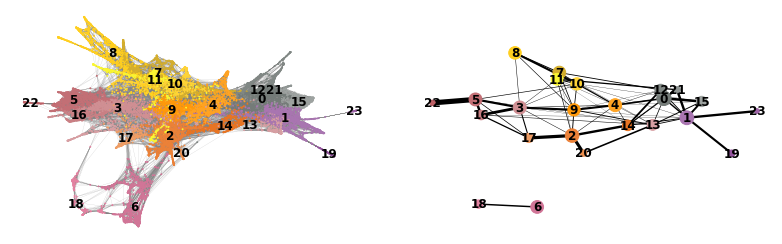

In [30]:
sc.pl.paga_compare(
    adata, threshold=0.03, title='', right_margin=0.1, size=15, edge_width_scale=0.7,
    legend_fontsize=12, fontsize=12, frameon=False, edges=True, save=False)

In [471]:
sc.tl.paga(adata, groups='leiden')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


In [474]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['cell_mk']  == 'CD8_ZNF683')[0]

In [475]:
sc.tl.dpt(adata)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


In [476]:
adata.obs['distance'] = adata.obs['dpt_pseudotime']

In [93]:
#adata_rna.obs.to_csv('tcells_git/results/DM_CD8_leiden.csv')

In [416]:
sc.pp.scale(adata_rna)

In [477]:
adata_rna.obsm=adata.obsm
adata_rna.uns=adata.uns
adata_rna.obsp=adata.obsp

adata_rna

AnnData object with n_obs × n_vars = 16259 × 23187
    obs: 'Unnamed: 0', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'tissue', 'seurat_clusters', 'pop', 'groups', 'S.Score', 'G2M.Score', 'Phase', 'percent.HS', 'percent.ribo', 'integrated_snn_res.1', 'frequency_ies', 'proportion_ies', 'cdr3s_aa', 'cdr3s_nt', 'clotype', 'type', 'Cell.ID', 'patient', 'cell_mk', 'new_id', 'CD8.SLC4A101', 'CD8.XCL11', 'CD8.GZMH1', 'CD8.KLF21', 'CD8.GZMK1', 'CD8.LAYN1', 'CD8.FCGR3A1', 'Oxidative.phosphorylation..from.KEGG.1', 'CD8.GZMK..from.Guo.et.al..2018.1', 'CD8.ZNF683..from.Guo.et.al..2018.1', 'Glycolysis..from.KEGG.1', 'CD8.LAYN..from.Guo.et.al..2018.1', 'Co.inhibitory.molecules..from.Chihara.et.al..2018.1', 'Good.response.to.ICP..from.Sade.Feldman.et.al..2018.1', 'Bad.response.to.ICP..from.Sade.Feldman.et.al..2018.1', 'Tumor.singletons1', 'Tumor.multiplets1', 'Dual.expanded.clones1', 'X8.1.Teff1', 'X8.2.Tem1', 'X8.3a.Trm1', 'X8.3b.Trm1', 'X8.3c.Trm1', 'X8.4

In [495]:
path_res = [('resident', [8, 10, 11, 7]),
         ('resident', [8, 10,4, 2, 11, 7]),
         ('resident', [4, 2,8, 10,11, 7])
         #('effector', [ 4, 2, 8,10])
        #('effector',[0, 12, 15,9,4,  20, 2,13, 11, 7])
        ]



In [465]:
path_gzmk = [('gzmk', [22,5,16,3,9, 4 ,17,2, 11, 7]),
         ('gzmk', [22,5,16,3,9, 4 ,17,2, 7]),
         ('gzmk', [22,5,16,3, 17, 2, 11,7])
         #('effector', [ 4, 2, 8,10])
        #('effector',[0, 12, 15,9,4,  20, 2,13, 11, 7])
        ]

In [486]:
path_cellmk=[('resident', ['CD8_ZNF683', 'CD8_XCL1', 'CD8_CXCL13']),
         ('resident_2', [  'CD8_ZNF683','CD8_CCL4', 'CD8_XCL1' ,'CD8_CXCL13']),
             ('gzmk', ['CD8_GZMK','CD8_GZMH','CD8_CCL4', 'CD8_XCL1', 'CD8_CXCL13'])]

In [482]:
gene_res = ['TCF7','SELL','CCR7','KLF2','ICOS',
              'CXCR6','ITGAE','PDCD1','TOX','CXCL13','HAVCR2','ENTPD1' ]

In [462]:
gene = [ 'TCF7','SELL','CCR7','GPR183','KLF2',
              'GZMH','CCL4','CXCR6','ITGAE','PDCD1','TOX','CXCL13','HAVCR2','ENTPD1'
                ]

In [458]:
gene_gzmk = [ 'TCF7','SELL','CCR7','GPR183','KLF2',
              'GZMH','CCL4','PDCD1','TOX','CXCL13','HAVCR2','ENTPD1'
                ]

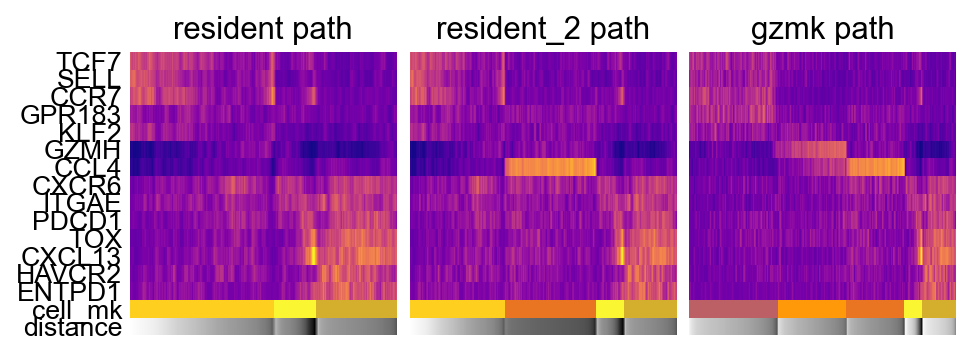

In [491]:
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(30, 20), facecolor='white') 
_, axs = pl.subplots(ncols=3, figsize=(6, 2.5), gridspec_kw={'wspace': 0.05, 'left': 0.12})
pl.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for ipath, (descr, path) in enumerate(path_cellmk):
    _, data = sc.pl.paga_path(
        adata_rna, path, gene,
        show_node_names=False,
        ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=['distance'],
        show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='plasma',
        groups_key='cell_mk',
        color_maps_annotations={'distance': 'Greys'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)
    #data.to_csv('./write/paga_path_{}.csv'.format(descr))
pl.savefig('./figures/paga_path_gzmk_cellmk.pdf')
pl.show()

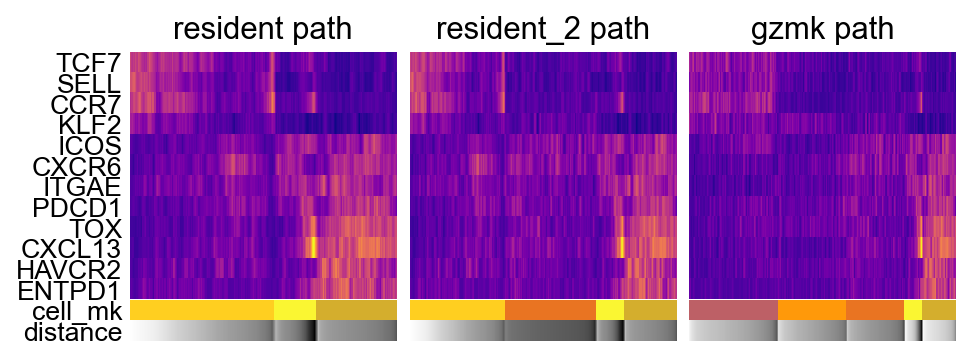

In [499]:
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(30, 20), facecolor='white') 
_, axs = pl.subplots(ncols=3, figsize=(6, 2.5), gridspec_kw={'wspace': 0.05, 'left': 0.12})
pl.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for ipath, (descr, path) in enumerate(path_cellmk):
    _, data = sc.pl.paga_path(
        adata_rna, path, gene_res,
        show_node_names=False,
        ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=['distance'],
        show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='plasma',
        groups_key='cell_mk',
        color_maps_annotations={'distance': 'Greys'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)
    #data.to_csv('./write/paga_path_{}.csv'.format(descr))
pl.savefig('./figures/paga_path_resident_cell_mk.pdf')
pl.show()

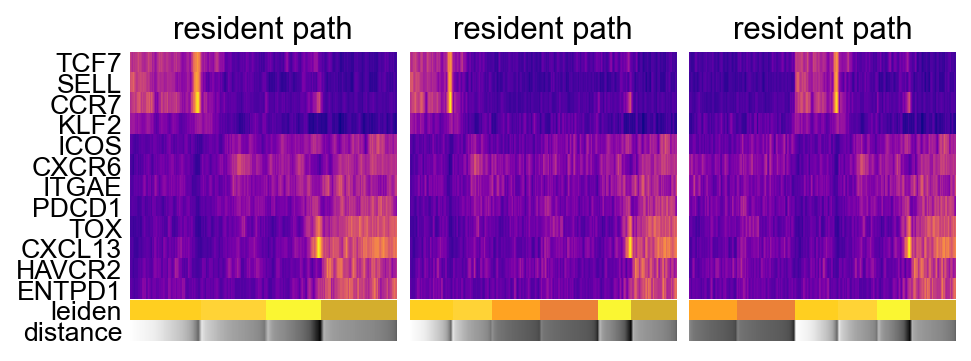

In [498]:
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(30, 20), facecolor='white') 
_, axs = pl.subplots(ncols=3, figsize=(6, 2.5), gridspec_kw={'wspace': 0.05, 'left': 0.12})
pl.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for ipath, (descr, path) in enumerate(path_res):
    _, data = sc.pl.paga_path(
        adata_rna, path, gene_res,
        show_node_names=False,
        ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=['distance'],
        show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='plasma',
        groups_key='leiden',
        color_maps_annotations={'distance': 'Greys'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)
    #data.to_csv('./write/paga_path_{}.csv'.format(descr))
pl.savefig('./figures/paga_path_resident_leiden.pdf')
pl.show()

In [338]:
path_gzmk=[('gzmk', ['CD8_GZMK','CD8_GZMH','CD8_CCL4', 'CD8_XCL1', 'CD8_CXCL13'])]

In [35]:
#paga plot using clusters from cell_mk
sc.tl.paga(adata, groups='cell_mk')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


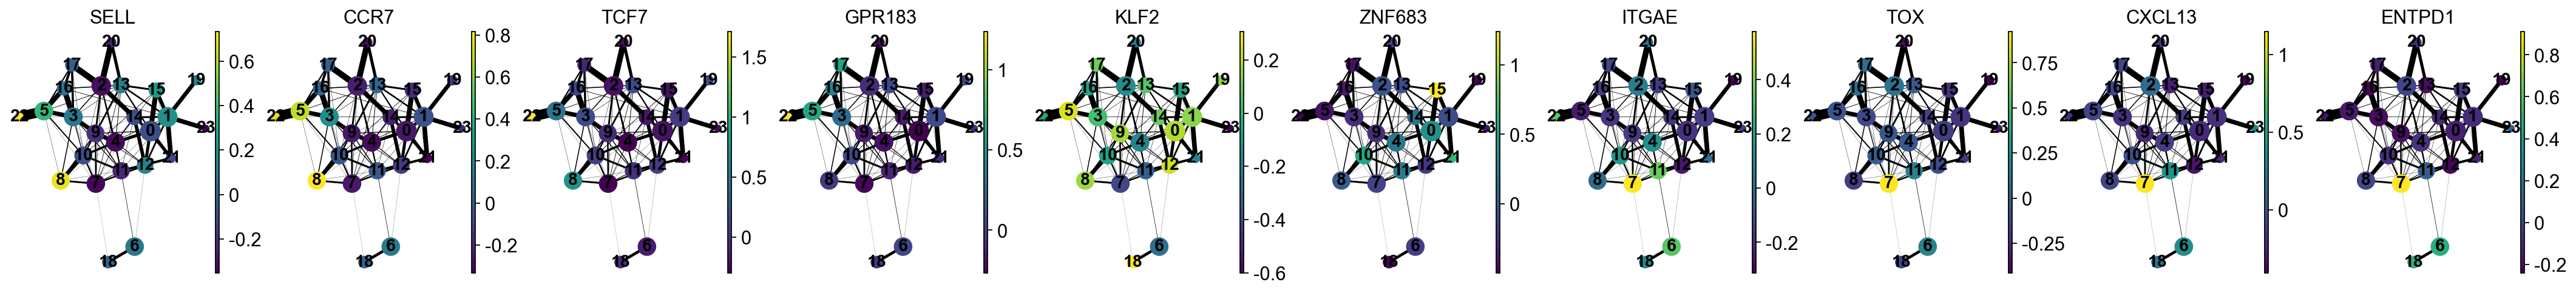

In [418]:
#sellected 
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white')  
sc.pl.paga(adata_rna, color=['SELL', 'CCR7','TCF7', 'GPR183','KLF2', 'ZNF683', 'ITGAE','TOX','CXCL13', 'ENTPD1'])

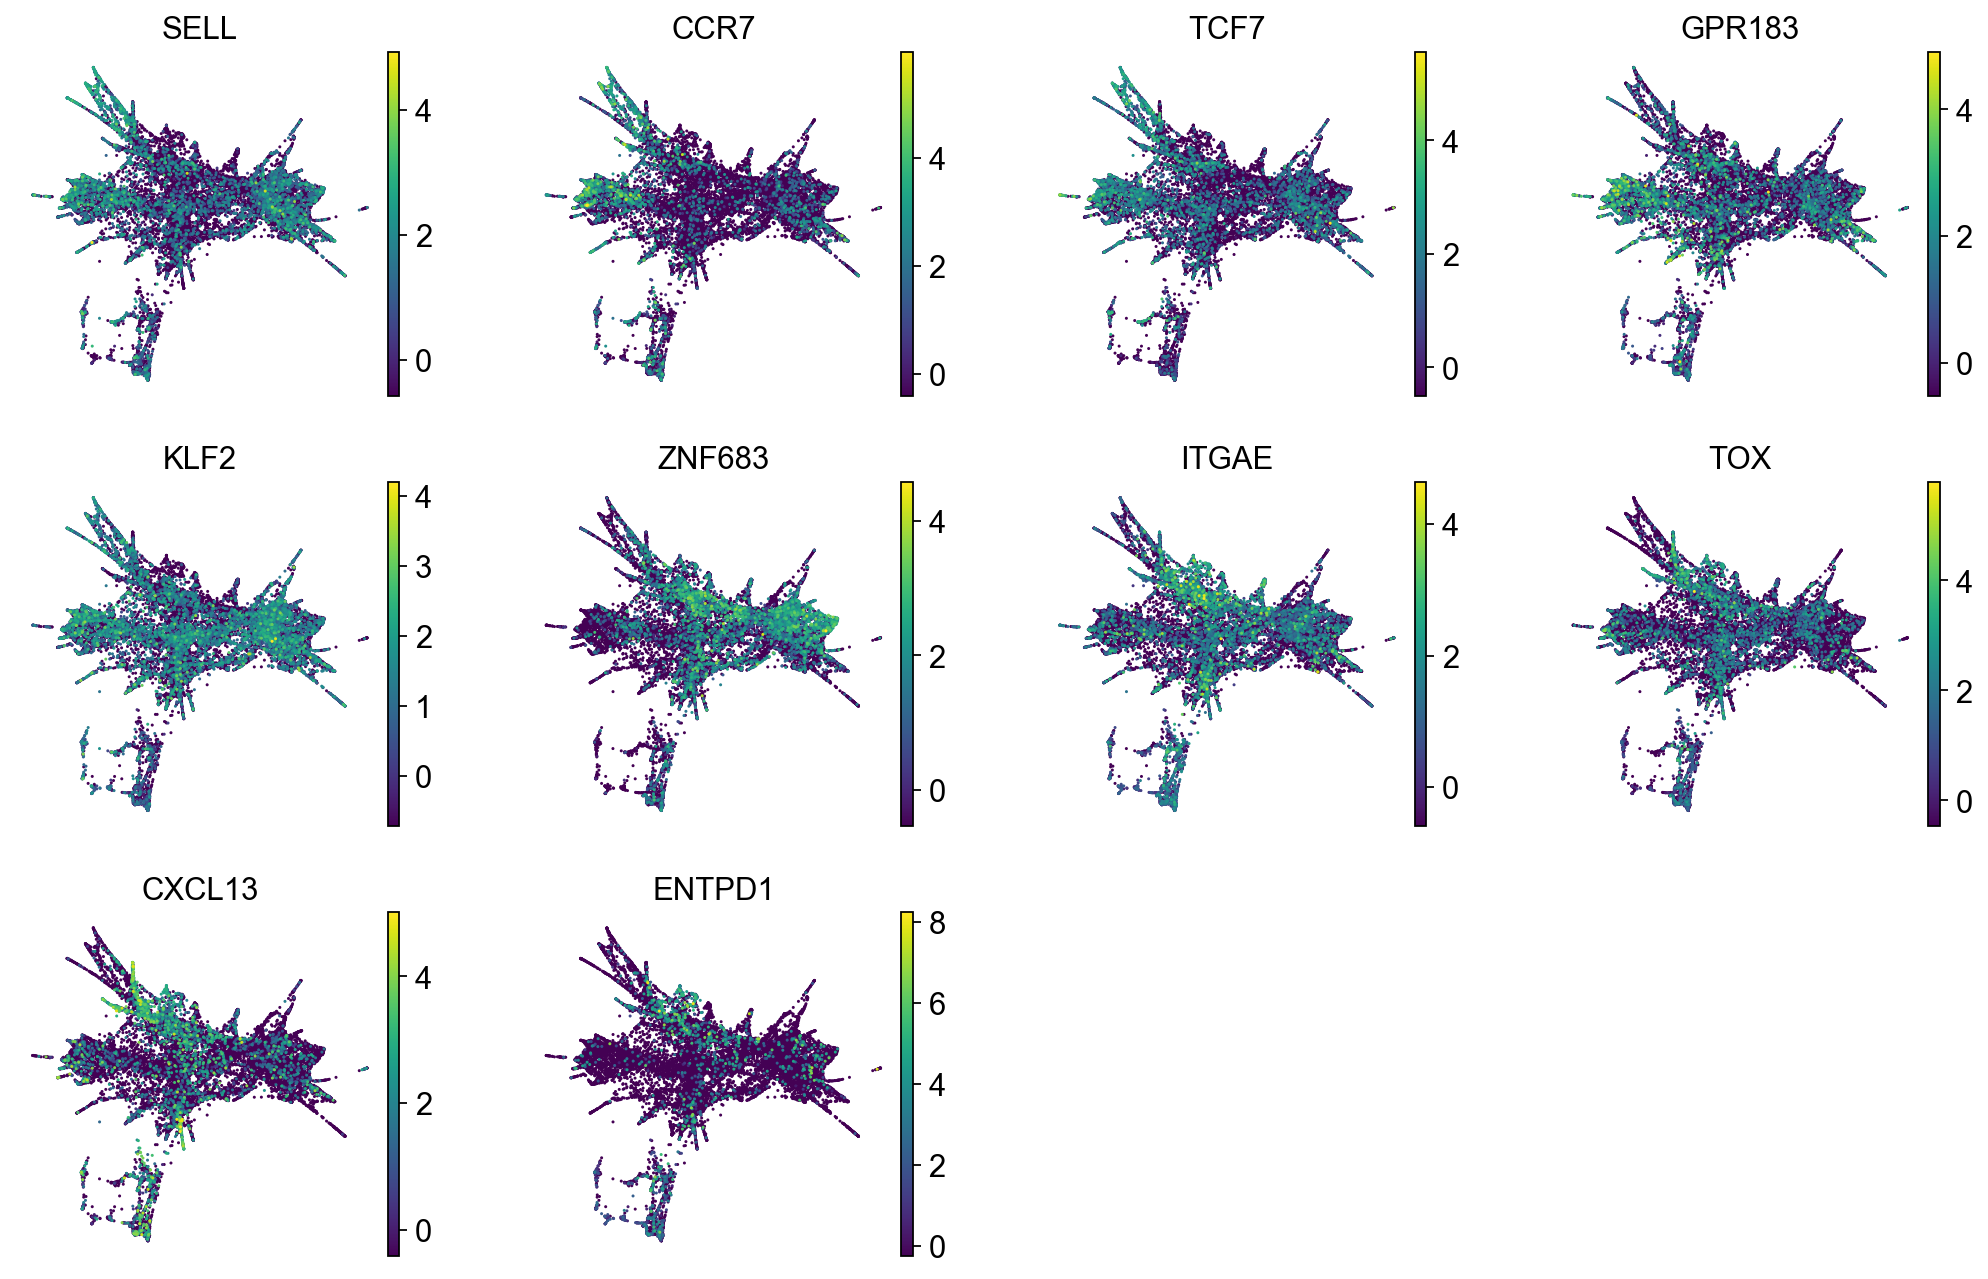

In [419]:
sc.pl.draw_graph(adata_rna, color=['SELL', 'CCR7','TCF7', 'GPR183','KLF2', 'ZNF683', 'ITGAE','TOX','CXCL13', 'ENTPD1' ])

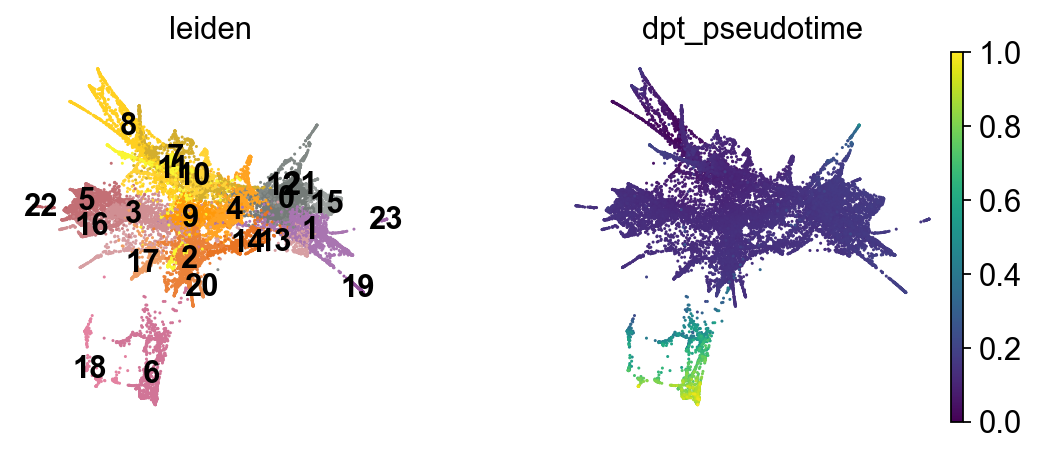

In [50]:
sc.pl.draw_graph(adata, color=['leiden', 'dpt_pseudotime'], legend_loc='on data')

In [ ]:
sc.tl.rank_genes_groups(adata_rna, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata_rna, n_genes=25, sharey=False)

In [ ]:
pd.DataFrame(adata_rna.uns['rank_genes_groups']['names']).head(20)

In [ ]:
sc.pl.tracksplot(adata_rna, ['GZMK', 'CCL4'], groupby='cell_mk', dendrogram=True)

In [ ]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(4, 2)
ax1_dict=sc.pl.embedding_density(p9454, groupby='tissue', basis='umap', ncols=2)
ax2_dict=sc.pl.embedding_density(p9293, groupby='tissue', basis='umap', ncols=2)
ax3_dict=sc.pl.embedding_density(p9808, groupby='tissue', basis='umap', ncols=2)
ax4_dict=sc.pl.embedding_density(p10329, groupby='tissue', basis='umap', ncols=2)
pl.savefig(gs, 'test.pdf')

In [ ]:
p10329=adata[adata.obs['patient']=='p10329']
sc.tl.embedding_density(p10329, groupby='tissue')


In [ ]:
p9808=adata[adata.obs['patient']=='p09808']
sc.tl.embedding_density(p9808, groupby='tissue')


In [ ]:
p9454=adata[adata.obs['patient']=='p09454']
sc.tl.embedding_density(p9454, groupby='tissue')


In [ ]:
p9293=adata[adata.obs['patient']=='p09293']
sc.tl.embedding_density(p9293, groupby='tissue')

In [ ]:
for orig in [ "d08861_blood", "d08862_blood" ,"p09293_blood" ,"p09293_tumor" ,"p09454_blood",
  "p09454_tumor", "p09704_tumor", "p09808_blood","p09808_tumor", "p10329_blood",
 "p10329_tumor"]:
    sc.pl.draw_graph(adata, color='orig.ident', groups=[orig], ncols=2, frameon=False)

In [ ]:
adata_sub=adata[adata.obs['patient'].isin(['p09293', 'p09454', 'p09808',  'p10329'])]
sc.tl.embedding_density(adata_sub, groupby='orig.ident')
sc.pl.embedding_density(adata_sub, groupby='orig.ident', basis='umap', ncols=2, save='cd8_tcellsObj.pdf', frameon=False)

In [ ]:
sc.tl.embedding_density(adata, groupby='patient')
sc.pl.embedding_density(adata, groupby='patient', basis='draw_graph_fa', ncols=3, save='cd8_tcellsObj__density.pdf')

In [ ]:
sc.pl.embedding_density(adata, groupby='tissue', basis='umap', ncols=3)